In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_forex = pd.read_csv('raw/forexExport_From_2020-03-10_To_2025-03-10.csv')
df_nifty = pd.read_csv('raw/NIFTY 500_Historical_PR_09032020to10032025.csv')
df_snp = pd.read_csv('raw/HistoricalData_1741598127799.csv')

In [82]:
df_forex.head()

,Date,inr_buy,inr_sell,usd_buy,usd_sell,eur_buy,eur_sell,gbp_buy,gbp_sell,chf_buy,...,dkk_buy,dkk_sell,hkd_buy,hkd_sell,kwd_buy,kwd_sell,bhd_buy,bhd_sell,omr_buy,omr_sell
0,2020-03-10,160.0,160.15,118.24,118.84,135.00,135.68,154.55,155.34,127.51,...,18.07,18.16,15.22,15.29,387.62,389.59,313.94,315.53,NaN,NaN
1,2020-03-11,160.0,160.15,118.30,118.90,134.42,135.11,154.23,155.01,126.89,...,17.99,18.08,15.22,15.30,386.73,388.69,313.63,315.22,NaN,NaN
2,2020-03-12,160.0,160.15,117.52,118.12,133.23,133.91,151.80,152.57,125.73,...,17.83,17.92,15.13,15.20,383.54,385.50,311.59,313.18,NaN,NaN
3,2020-03-13,160.0,160.15,118.44,119.04,132.86,133.53,150.74,151.51,125.96,...,17.78,17.87,15.23,15.31,385.94,387.89,314.47,316.06,NaN,NaN
4,2020-03-14,160.0,160.15,117.98,118.58,131.80,132.47,148.16,148.91,124.60,...,17.64,17.72,15.19,15.26,383.43,385.38,312.49,314.08,NaN,NaN


In [83]:
df_forex = df_forex.iloc[:,0:5]

In [84]:
df_nifty.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 500,07 Mar 2025,20428.15,20549.20,20377.60,20443.40
1,NIFTY 500,06 Mar 2025,20411.45,20467.15,20262.75,20447.10
2,NIFTY 500,05 Mar 2025,19901.60,20265.05,19901.60,20256.50
3,NIFTY 500,04 Mar 2025,19736.05,19957.50,19681.65,19917.85
4,NIFTY 500,03 Mar 2025,19935.55,19997.05,19658.30,19896.95


In [85]:
df_nifty = df_nifty.iloc[:,1:]

In [86]:
df_nifty.head()

,Date,Open,High,Low,Close
0,07 Mar 2025,20428.15,20549.20,20377.60,20443.40
1,06 Mar 2025,20411.45,20467.15,20262.75,20447.10
2,05 Mar 2025,19901.60,20265.05,19901.60,20256.50
3,04 Mar 2025,19736.05,19957.50,19681.65,19917.85
4,03 Mar 2025,19935.55,19997.05,19658.30,19896.95


In [87]:
# Converting date into a uniform format
df_forex['Date'] = pd.to_datetime(df_forex['Date'],errors='coerce')
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'],errors='coerce')
df_snp['Date']  = pd.to_datetime(df_snp['Date'], errors='coerce')

In [88]:
df = pd.merge(df_forex, df_nifty, on ='Date', how='inner')
df = pd.merge(df, df_snp, on = 'Date', how='inner')

In [89]:
df.head()

,Date,inr_buy,inr_sell,usd_buy,usd_sell,Open_x,High_x,Low_x,Close,Close/Last,Open_y,High_y,Low_y
0,2020-03-11,160.0,160.15,118.30,118.90,8556.10,8709.50,8555.80,8618.05,2741.38,2825.60,2825.60,2707.22
1,2020-03-12,160.0,160.15,117.52,118.12,8272.40,8272.85,7841.50,7901.35,2480.64,2630.86,2660.95,2478.86
2,2020-03-13,160.0,160.15,118.44,119.04,7425.05,8298.00,7028.70,8163.00,2711.02,2569.99,2711.33,2492.37
3,2020-03-16,160.0,160.15,117.71,118.31,7867.00,7904.25,7564.80,7591.90,2386.13,2508.59,2562.98,2380.94
4,2020-03-17,160.0,160.15,118.54,119.14,7642.35,7746.15,7383.35,7417.65,2529.19,2425.66,2553.93,2367.04


In [90]:
df_correlation = df[['Date','inr_buy', 'inr_sell', 'usd_buy', 'usd_sell', 'Close/Last', 'Close']]

In [91]:
df_correlation = df_correlation.rename(columns={
    'inr_buy': 'INR_Buy',
    'inr_sell': 'INR_Sell',
    'usd_buy': 'USD_Buy',
    'usd_sell': 'USD_Sell',
    'Close/Last': 'SP500_Close',
    'Close': 'Nifty500_Close'
})

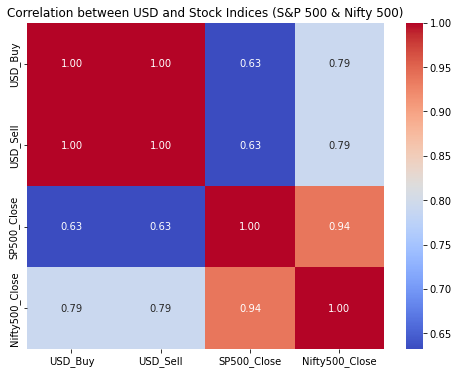

In [96]:
correlation_matrix = df_correlation[['USD_Buy', 'USD_Sell', 'SP500_Close', 'Nifty500_Close']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between USD and Stock Indices (S&P 500 & Nifty 500)")
plt.show()


In [97]:
correlation_matrix

,USD_Buy,USD_Sell,SP500_Close,Nifty500_Close
USD_Buy,1.000000,1.000000,0.632520,0.790684
USD_Sell,1.000000,1.000000,0.632520,0.790684
SP500_Close,0.632520,0.632520,1.000000,0.938066
Nifty500_Close,0.790684,0.790684,0.938066,1.000000


1
